# Calculus tutorial figures generation

This notebook contains all the figure generation code for [Section 2.4 Calculus prerequisites]() in the **No Bullshit Guide to Statistics**.

(see formulas and definitions in the book)

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.clf()
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"text.usetex":True,
        "font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 1.7)},
)
%config InlineBackend.figure_format = 'retina'

# simple float __repr__
np.set_printoptions(legacy='1.25')

<Figure size 640x480 with 0 Axes>

In [3]:
# Temporary for figure generation
import os
from ministats.utils import savefigure

In [4]:
# set random seed for repeatability
np.random.seed(3)

### Functions

In Python, we define functions using the `def` keyword.

For example, the code cell below defines the function $f(x) = x^2$,
then evaluate it for the input $x=3$.

In [5]:
# define the function f that takes input x
def f(x):
    return x**2

# calling the function g on input x=4
f(3)

9

#### Function graphs

The graph of the function $f(x)$ is obtained by plotting a curve
that passes through the set of input-output coordinate pairs $(x, f(x))$.

In [6]:
import numpy as np
xs = np.linspace(-3, 3, 1000)
fxs = f(xs)

Saved figure to figures/tutorials/calculus/graph_of_function_f_eq_x2.pdf
Saved figure to figures/tutorials/calculus/graph_of_function_f_eq_x2.png


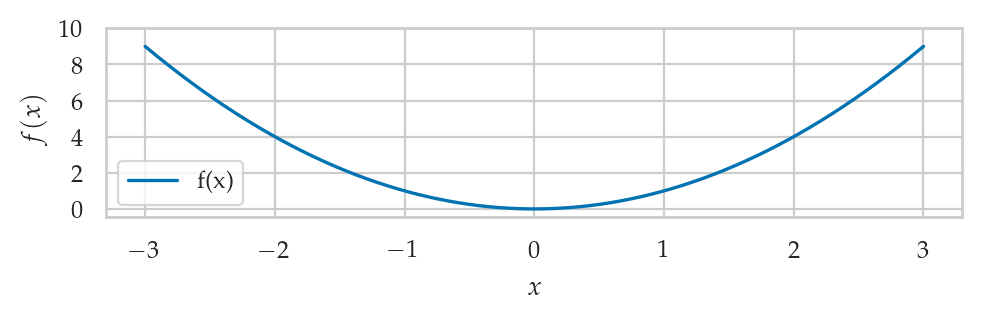

In [7]:
import seaborn as sns
sns.lineplot(x=xs, y=fxs, label="f(x)");

# FIGURES ONLY
ax = plt.gca()
ax.set_yticks(range(0,10+2,2))
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
filename = os.path.join("figures/tutorials/calculus", "graph_of_function_f_eq_x2.pdf")
savefigure(plt.gca(), filename)

### Function inventory

Saved figure to figures/tutorials/calculus/panel_function_graphs1.pdf
Saved figure to figures/tutorials/calculus/panel_function_graphs1.png


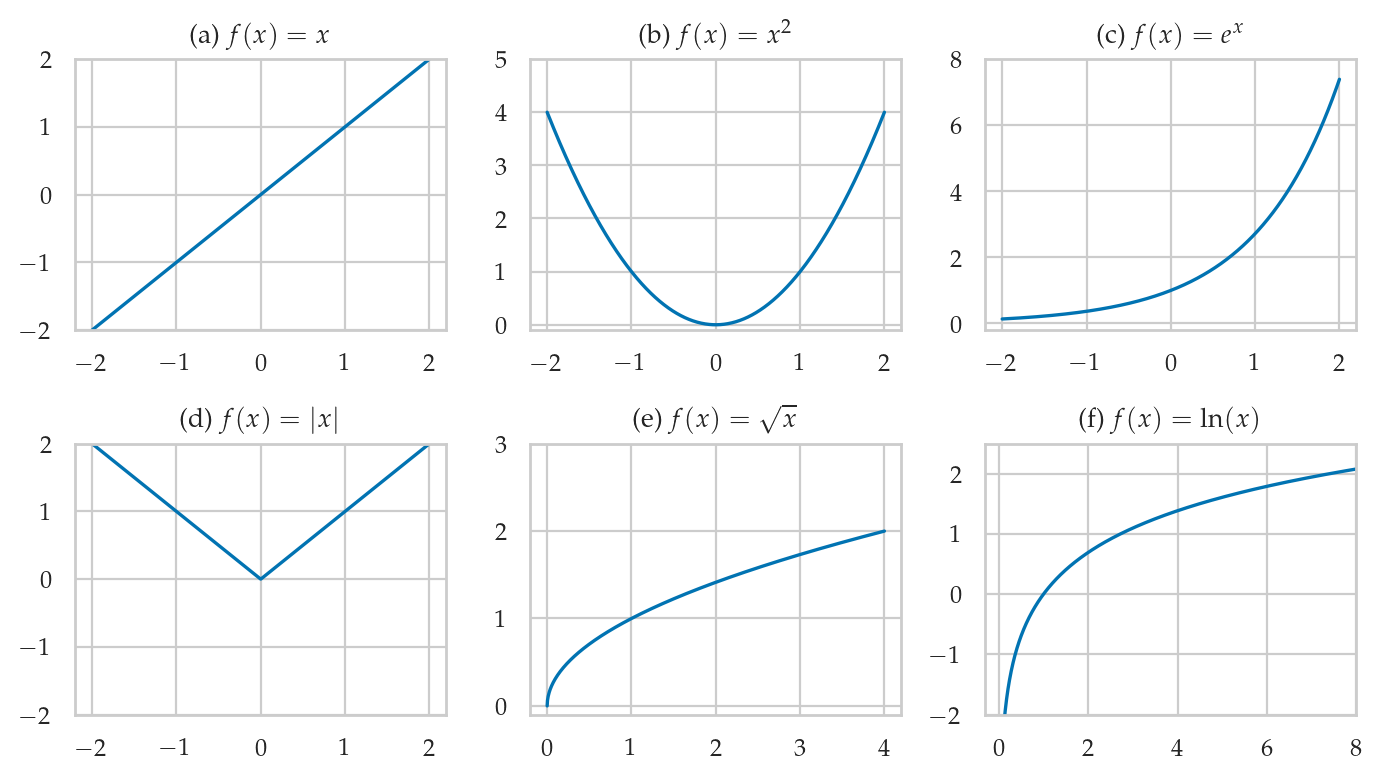

In [8]:
# from ministats.calculus import plot_func

def plot_func(f, xlim=[-1,1], ylim=None, ax=None, title=None):
    xs = np.linspace(xlim[0], xlim[1], 1000)
    fxs = np.array([f(x) for x in xs])
    ax = sns.lineplot(x=xs, y=fxs, ax=ax)
    ax.set_title(title)
    ax.set_ylim(ylim)
    return ax

fig, axs = plt.subplots(2, 3, figsize=(7,4))


# (a) line
def line(x):
    return x
ax_a = axs[0][0]
plot_func(line, xlim=[-2,2], ylim=[-2,2], ax=ax_a, title="(a) $f(x) = x$")

# (b) quadratic
ax_b = axs[0][1]
def quadratic(x):
    return x**2
plot_func(quadratic, xlim=[-2,2], ylim=[-0.1,5], ax=ax_b, title="(b) $f(x) = x^2$")
ax_b.set_yticks([0,1,2,3,4,5])

# (c) exp
ax_c = axs[0][2]
plot_func(np.exp, xlim=[-2,2], ylim=[-0.2,8], ax=ax_c, title="(c) $f(x) = e^x$")

# (d) |x|
ax_d = axs[1][0]
plot_func(np.abs, xlim=[-2,2], ylim=[-2,2], ax=ax_d, title="(d) $f(x) = |x|$")

# (e) square root
ax_e = axs[1][1]
plot_func(np.sqrt, xlim=[0,4], ylim=[-0.1,2.8], ax=ax_e, title="(e) $f(x) = \\sqrt{x}$")
ax_e.set_xticks([0,1,2,3,4])
ax_e.set_yticks([0,1,2,3])

# (f) log
ax_f = axs[1][2]
plot_func(np.log, xlim=[0.00001,8], ylim=[-2,2.5], ax=ax_f, title="(f) $f(x) = \\ln(x)$")
ax_f.set_xlim([-0.3,8])

fig.tight_layout()

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "panel_function_graphs1.pdf")
savefigure(plt.gca(), filename)

### Trigonometric functions

Saved figure to figures/tutorials/calculus/panel_function_graphs2.pdf
Saved figure to figures/tutorials/calculus/panel_function_graphs2.png


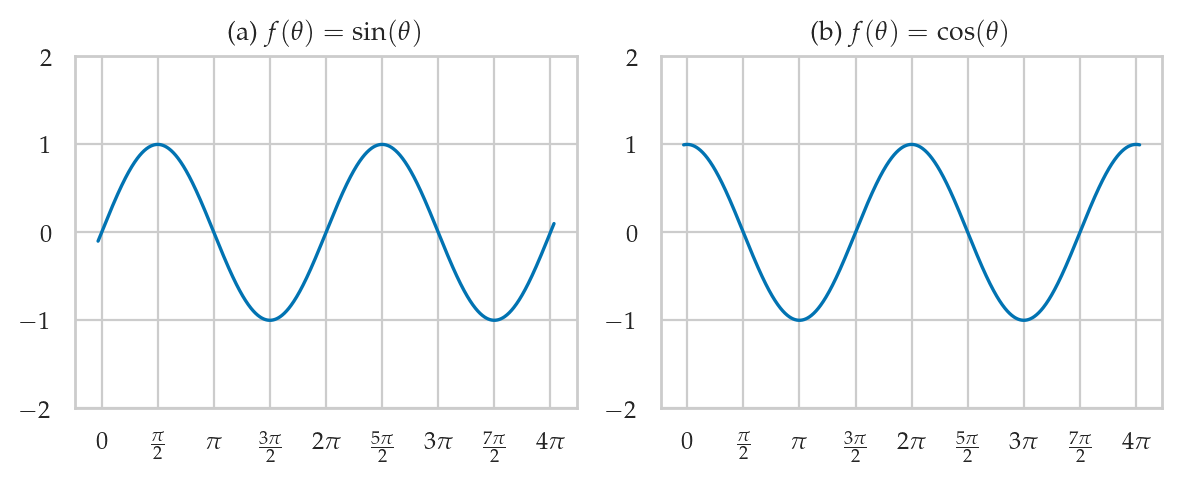

In [9]:
# TODO: move to ministats.figures

fig, axs = plt.subplots(1, 2, figsize=(6,2.5))

xlim = [-0.1, 4*np.pi+0.1]

# ticks at multiples of pi/2 within xlim
xticks = np.arange(0, 4*np.pi + 1e-9, np.pi/2)
xtick_labels = [
    r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",
    r"$2\pi$", r"$\frac{5\pi}{2}$", r"$3\pi$", r"$\frac{7\pi}{2}$",
    r"$4\pi$"
]

# (a) sin
ax_a = axs[0]
plot_func(np.sin, xlim=xlim, ylim=[-2,2], ax=ax_a, title=r"(a) $f(\theta) = \sin(\theta)$")
ax_a.set_xticks(xticks)
ax_a.set_xticklabels(xtick_labels)


# (b) cos
ax_b = axs[1]
plot_func(np.cos, xlim=xlim, ylim=[-2,2], ax=ax_b, title=r"(b) $f(\theta) = \cos(\theta)$")
ax_b.set_xticks(xticks)
ax_b.set_xticklabels(xtick_labels)

# # (c) tan
# ax_c = axs[2]
# def plot_tan(xlim=[-1,1], ylim=None, ax=None, title=None):
#     num_periods = int(xlim[1] / np.pi)
#     xleft = xlim[0]
#     for k in range(0, num_periods+1):
#         xright = np.pi/2 + k*np.pi + -0.0001
#         if xright > xlim[1]:
#             xright = xlim[1]
#         xs = np.linspace(xleft, xright, 1000)
#         fxs = np.array([np.tan(x) for x in xs])
#         ax = sns.lineplot(x=xs, y=fxs, ax=ax, color="C0")
#         xleft = np.pi/2 + k*np.pi + 0.0001
#     ax.set_title(title)
#     ax.set_ylim(ylim)
# plot_tan(xlim=xlim, ylim=[-10,10], ax=ax_c, title=r"(c) $f(\theta) = \tan(\theta)$")

fig.tight_layout()

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "panel_function_graphs2.pdf")
savefigure(plt.gca(), filename)

## Limits

Saved figure to figures/tutorials/calculus/limits_examples.pdf
Saved figure to figures/tutorials/calculus/limits_examples.png


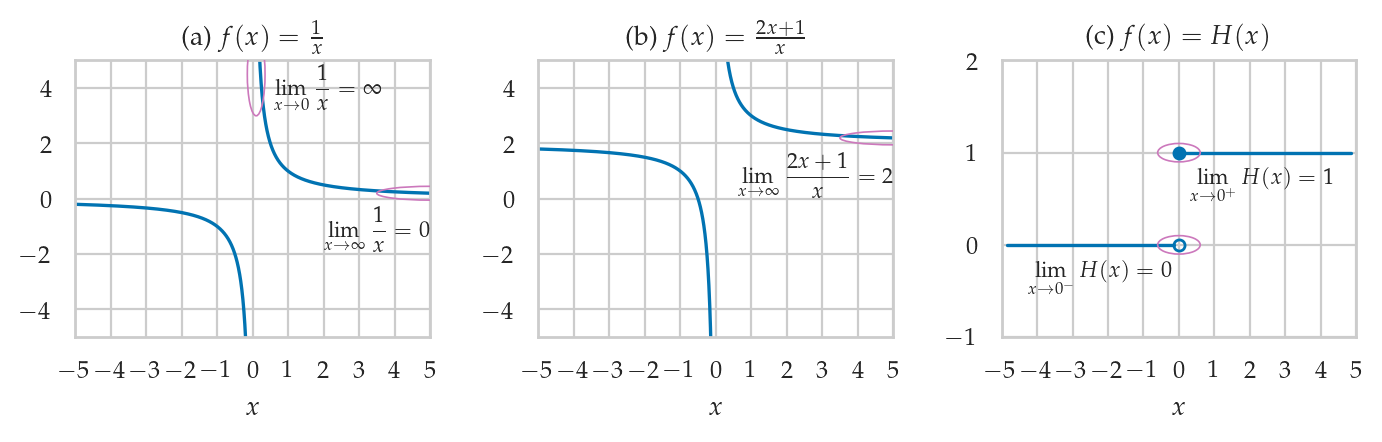

In [10]:
# FIGURES ONLY
from ministats.calculus import plot_limit
from ministats.calculus import plot_ellipse

fig, axs = plt.subplots(1, 3, figsize=(7,2.3))


# (a) Limits involving f(x) = 1/x
def finv(x):
    return 1/x
ax = plot_limit(finv, xlim=[[-5,0],[0,5]], ylim=[-5,5], ax=axs[0])
ax.set_xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.set_xlabel("$x$")
ax.set_title(r"(a) $f(x) = \frac{1}{x}$")
# ellipse annotaiton x \to infty
plot_ellipse(ax, 5, 0.2, 3, 0.5, lx=5, ly=-1.1, ha="right",
             label=r"$\displaystyle \lim_{x \to \infty} \frac{1}{x} = 0$")
# ellipse annotaiton x \to 0+
plot_ellipse(ax, 0.1, 4.5, 0.5, 3, lx=0.6, ly=4, 
             label=r"$\displaystyle \lim_{x \to 0} \frac{1}{x} = \infty$")


# (b) Limits involving f(x) = (2x+1)/x
def f2example(x):
    return (2*x+1)/x
ax = plot_limit(f2example, xlim=[[-5,0],[0,5]], ylim=[-5,5], ax=axs[1])
ax.set_xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.set_xlabel("$x$")
ax.set_title("(b) $f(x) = \\frac{2x+1}{x}$")
# ellipse annotaiton x \to infty
plot_ellipse(ax, 5, 2.2, 3, 0.5, lx=5, ly=0.85, ha="right",
             label=r"$\displaystyle \lim_{x \to \infty} \frac{2x+1}{x} = 2$")


# (c) Limits involving the Heaviside step function f(x) = H(x)
def H(x):
    if x >= 0:
        return 1
    else:
        return 0
ax = plot_limit(H, xlim=[[-5,0],[0,5]], eps=0.15, ylim=[-1,2], ax=axs[2])
ax.set_xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.set_xlabel("$x$")
ax.set_title("(c) $f(x) = H(x)$")
# continuous point (filled circle)
ax.plot(0, 1, marker='o', markersize=4, color='C0')
# discontinuous point (open circle)
ax.plot(0, 0, marker='o', markersize=4, markerfacecolor='none', markeredgecolor='C0')
# ellipse annotation (from the left)
plot_ellipse(ax, 0, 0, 1.2, 0.2, lx=-0.2, ly=-0.35, ha="right",
             label=r"$\displaystyle \lim_{x \to 0^-} H(x) = 0$")
# ellipse annotation (from the right)
plot_ellipse(ax, 0, 1, 1.2, 0.2, lx=0.3, ly=0.65,
             label=r"$\displaystyle \lim_{x \to 0^+} H(x) = 1$")


filename = os.path.join("figures/tutorials/calculus", "limits_examples.pdf")
savefigure(ax, filename)

## Derivatives

Saved figure to figures/tutorials/calculus/slope_calculations.pdf
Saved figure to figures/tutorials/calculus/slope_calculations.png


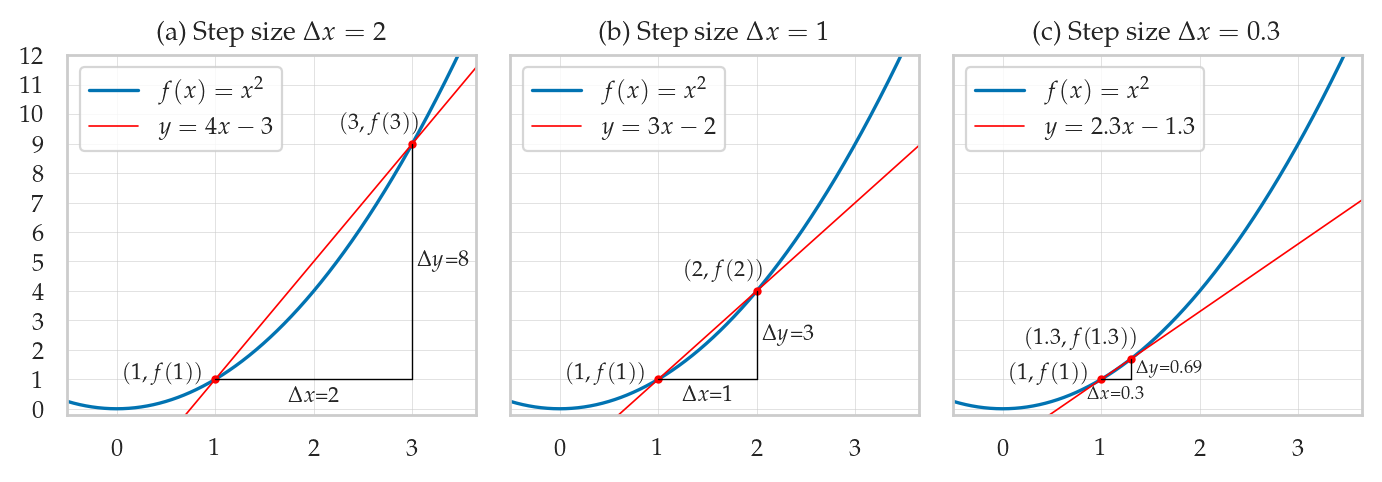

In [11]:
# FIGURES ONLY
from ministats.calculus import plot_slope

def f(x):
    return x**2

xlim = [-0.5, 3.65]
ylim = [-0.2, 12]

xticks = range(0, 4)

with plt.rc_context({"grid.linewidth": 0.2}):
    fig, axs = plt.subplots(1, 3, figsize=(7,2.5), sharey=True)

    # (a) Slope using delta=2
    ax = plot_slope(f, x=1, delta=2, xlim=xlim, ylim=ylim, ax=axs[0])
    ax.set_xticks(xticks)
    ax.set_yticks(range(0,16))
    ax.set_title("(a) Step size $\\Delta x = 2$")

    # (b) Slope using delta=1
    ax = plot_slope(f, x=1, delta=1, xlim=xlim, ylim=ylim, ax=axs[1])
    ax.set_xticks(xticks)
    ax.set_title("(b) Step size $\\Delta x = 1$")
    
    # (c) Slope using delta=0.3
    ax = plot_slope(f, x=1, delta=0.3, xlim=xlim, ylim=ylim, ax=axs[2])
    ax.set_xticks(xticks)
    ax.set_title("(c) Step size $\\Delta x = 0.3$")
    
    filename = os.path.join("figures/tutorials/calculus", "slope_calculations.pdf")
    savefigure(ax, filename)

## Integrals

In [12]:
def h(x):
    return 4 - x**2

Saved figure to figures/tutorials/calculus/simple_integral_hx_eq_x.pdf
Saved figure to figures/tutorials/calculus/simple_integral_hx_eq_x.png


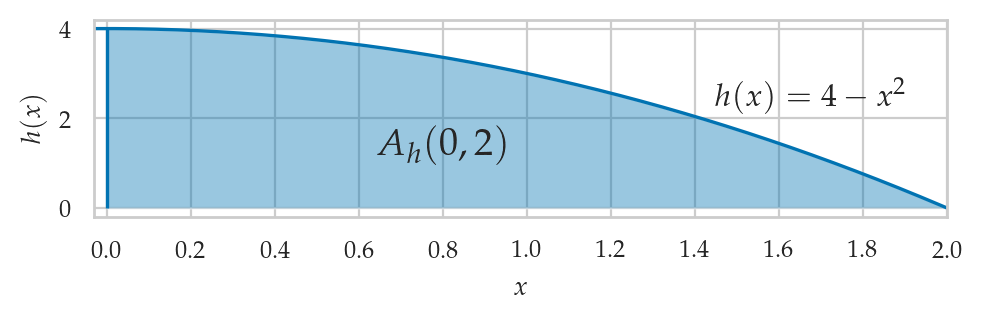

In [13]:
from ministats.calculus import plot_integral
ax = plot_integral(h, a=0, b=2, xlim=[-0.03,2], flabel="h")
ax.set_xticks(np.arange(0,2.2,0.2))
ax.text(1.9, 2.3, "$h(x)=4-x^2$", ha="right", fontsize="large")
# ax.arrow(3, 0.5, -1.6, -0.2, color="black")
ax.text(0.8, 1.2, "$A_h(0,2)$", ha="center", fontsize="x-large");

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "simple_integral_hx_eq_x.pdf")
savefigure(ax, filename)

In [14]:
def integrate(f, a, b, n=10000):
    """
    Computes the area under the graph of `f`
    between `x=a` and `x=b` using `n` rectangles.
    """
    dx = (b - a) / n                       # width of rectangular strips
    xs = [a + k*dx for k in range(1,n+1)]  # right-corners of the strips
    fxs = [f(x) for x in xs]               # heights of the strips
    area = sum([fx*dx for fx in fxs])      # total area
    return area

Riemann sum with n=10 rectangles: approx. area ≈ 4.92000
Riemann sum with n=20 rectangles: approx. area ≈ 5.13000
Saved figure to figures/tutorials/calculus/riemann_sum_n10_n20.pdf
Saved figure to figures/tutorials/calculus/riemann_sum_n10_n20.png


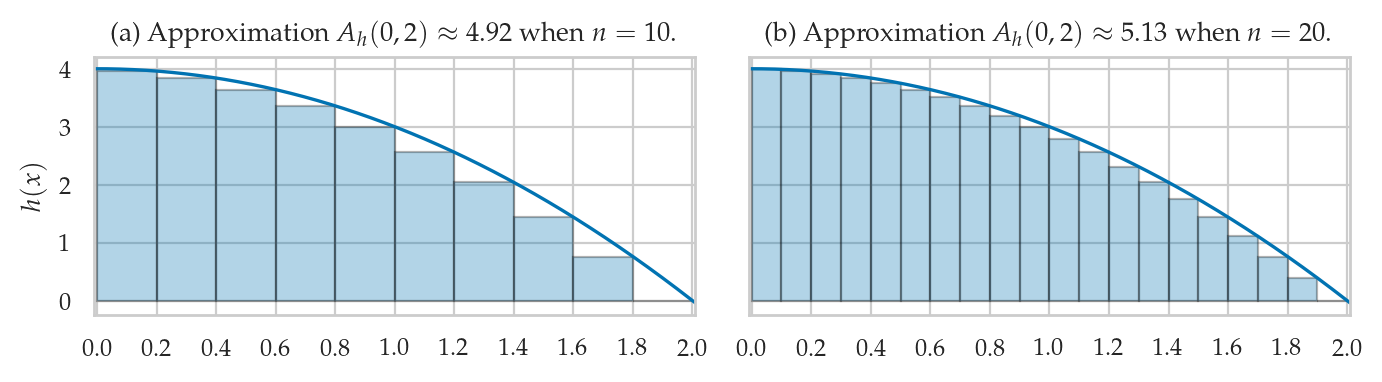

In [15]:
from ministats.calculus import plot_riemann_sum

# FIGURES ONLY
fig, axs = plt.subplots(1, 2, figsize=(7,2), sharey=True)

plot_riemann_sum(h, a=0, b=2, xlim=[-0.01,2.01], n=10, flabel="h", ax=axs[0])
axs[0].set_xticks(np.arange(0,2.2,0.2))
area_10 = integrate(h, a=0, b=2, n=10)
axs[0].set_title(f"(a) Approximation $A_h(0,2) \\approx {area_10}$ when $n=10$.")
axs[0].set_xlabel(None)

plot_riemann_sum(h, a=0, b=2, xlim=[-0.01,2.01], n=20, flabel="h", ax=axs[1])
axs[1].set_xticks(np.arange(0,2.2,0.2))
axs[1].set_xlabel(None)
area_20 = integrate(h, a=0, b=2, n=20)
axs[1].set_title(f"(b) Approximation $A_h(0,2) \\approx {area_20}$ when $n=20$.")
fig.tight_layout()

filename = os.path.join("figures/tutorials/calculus", "riemann_sum_n10_n20.pdf")
savefigure(plt.gca(), filename)

Riemann sum with n=50 rectangles: approx. area ≈ 5.25280
Riemann sum with n=100 rectangles: approx. area ≈ 5.29320
Saved figure to figures/tutorials/calculus/riemann_sum_n50_n100.pdf
Saved figure to figures/tutorials/calculus/riemann_sum_n50_n100.png


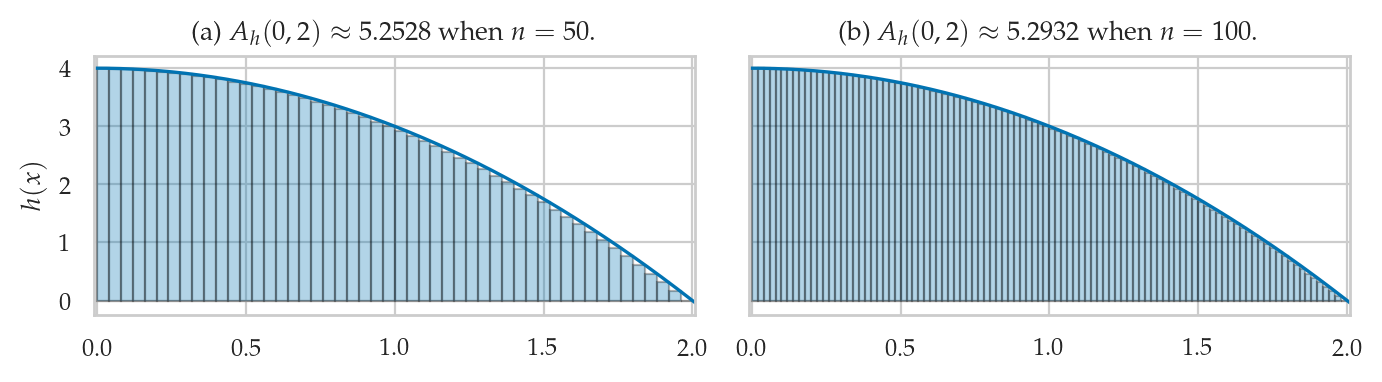

In [16]:
# FIGURES ONLY
fig, axs = plt.subplots(1, 2, figsize=(7,2), sharey=True)

plot_riemann_sum(h, a=0, b=2, xlim=[-0.01,2.01], n=50, flabel="h", ax=axs[0])
area_50 = integrate(h, a=0, b=2, n=50)
axs[0].set_title(f"(a) $A_h(0,2) \\approx {area_50}$ when $n=50$.")
axs[0].set_xlabel(None)

plot_riemann_sum(h, a=0, b=2, xlim=[-0.01,2.01], n=100, flabel="h", ax=axs[1])
area_100 = integrate(h, a=0, b=2, n=100)
axs[1].set_title(f"(b) $A_h(0,2) \\approx {area_100}$ when $n=100$.")
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)

fig.tight_layout()
filename = os.path.join("figures/tutorials/calculus", "riemann_sum_n50_n100.pdf")
savefigure(fig, filename)

#### Example 11 revisited

Saved figure to figures/tutorials/calculus/simple_integral_function_fx_eq_3.pdf
Saved figure to figures/tutorials/calculus/simple_integral_function_fx_eq_3.png


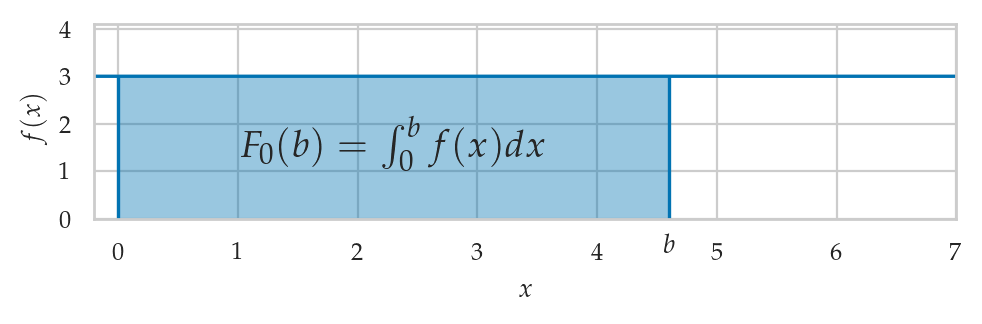

In [17]:
from ministats.calculus import plot_integral

def f(x):
    return 3


ax = plot_integral(f, a=0, b=4.6, xlim=[-0.2,7], flabel="f")
ax.set_ylim(0,4.1)
ax.set_yticks([0,1,2,3,4])
ax.text(2.3, 1.3, "$F_0(b)=\\int_{0}^{b} f(x)dx$", ha="center", fontsize="x-large");
ax.text(4.6, -0.7, "$b$", ha="center")

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "simple_integral_function_fx_eq_3.pdf")
savefigure(ax, filename)

#### Example 12 revisited

Saved figure to figures/tutorials/calculus/simple_integral_function_gx_eq_x.pdf
Saved figure to figures/tutorials/calculus/simple_integral_function_gx_eq_x.png


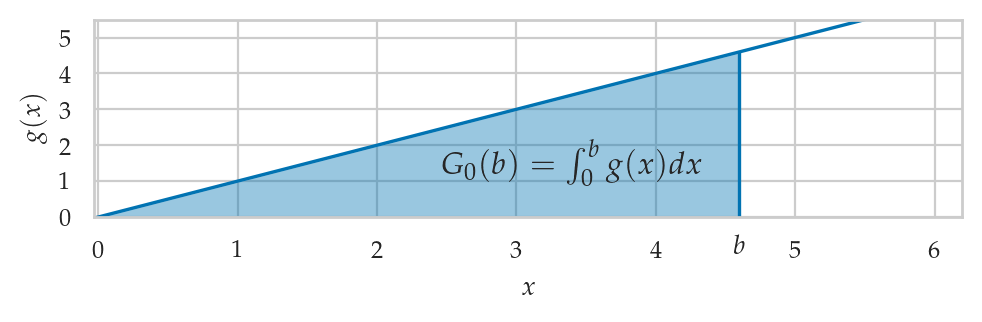

In [18]:
def g(x):
    return x

ax = plot_integral(g, a=0, b=4.6, xlim=[-0.03,6.2], flabel="g")
ax.set_ylim(0, 5.5)
ax.set_yticks([0,1,2,3,4,5])
ax.text(3.4, 1.2, "$G_0(b)=\\int_{0}^{b} g(x)dx$", ha="center", fontsize="large");
ax.text(4.6, -1, "$b$", ha="center")

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "simple_integral_function_gx_eq_x.pdf")
savefigure(ax, filename)

#### Example 13 revisited

Saved figure to figures/tutorials/calculus/integral_function_hx_eq_x.pdf
Saved figure to figures/tutorials/calculus/integral_function_hx_eq_x.png


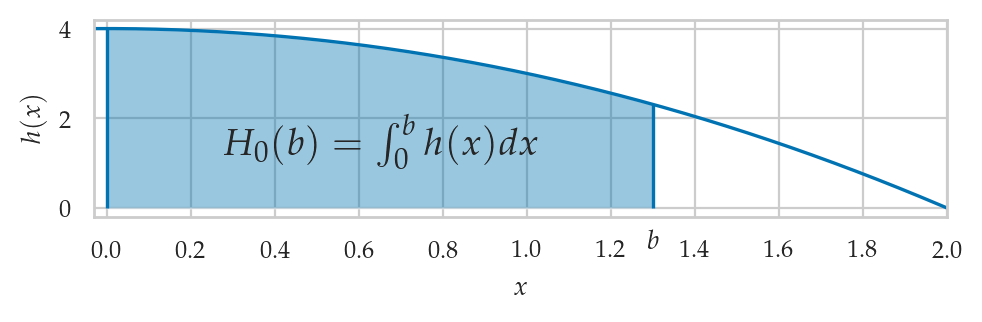

In [19]:
def h(x):
    return 4 - x**2

ax = plot_integral(h, a=0, b=1.3, xlim=[-0.03,2], flabel="h")
ax.set_xticks(np.arange(0,2.2,0.2))
ax.text(0.65, 1.2, "$H_0(b)=\\int_{0}^{b} h(x)dx$", ha="center", fontsize="x-large");
ax.text(1.3, -0.9, "$b$", ha="center")

# FIGURES ONLY
filename = os.path.join("figures/tutorials/calculus", "integral_function_hx_eq_x.pdf")
savefigure(ax, filename)

## Multivariable calculus

In [20]:
import numpy as np
import matplotlib.pyplot as plt

xmax = 2.01
ymax = 4.02

x = np.linspace(-xmax, xmax, 300)
y = np.linspace(-ymax, ymax, 300)
X, Y = np.meshgrid(x, y)
Z = 4 - X**2 - Y**2/4

Saved figure to figures/tutorials/calculus/mulivar_surface_plot_paraboloid.pdf
Saved figure to figures/tutorials/calculus/mulivar_surface_plot_paraboloid.png


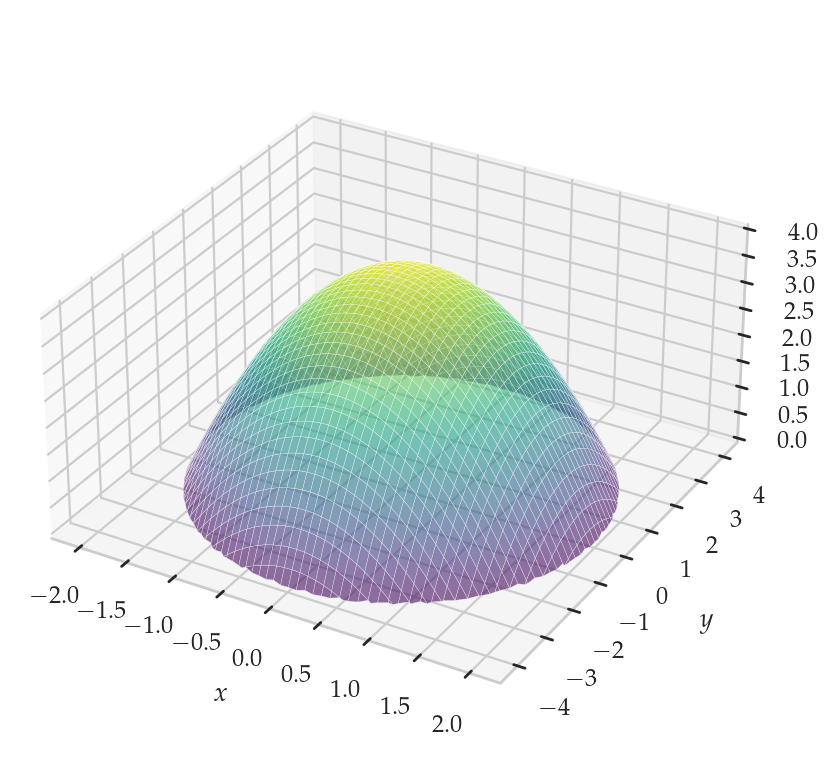

In [21]:
# Surface plot
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection="3d")
Zpos = np.ma.masked_where(Z < 0, Z)
surf = ax.plot_surface(X, Y, Zpos,
                       # rstride=3, cstride=3,
                       alpha=0.6,
                       linewidth=0.1,
                       antialiased=True,
                       cmap="viridis")
ax.set_box_aspect((2, 2, 1))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x,y)$");

filename = os.path.join("figures/tutorials/calculus", "mulivar_surface_plot_paraboloid.pdf")
savefigure(ax, filename)

Saved figure to figures/tutorials/calculus/mulivar_countour_plot_paraboloid.pdf
Saved figure to figures/tutorials/calculus/mulivar_countour_plot_paraboloid.png


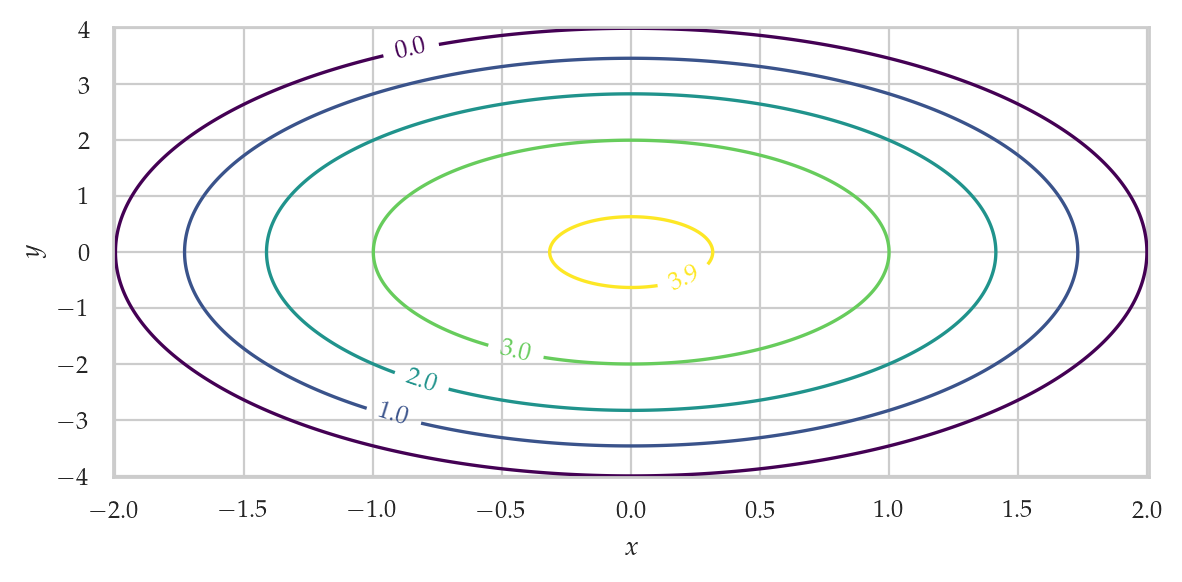

In [22]:
fig, ax = plt.subplots(figsize=(6,3))
cplot = ax.contour(X, Y, Z,
                   levels=[0,1,2,3,3.9],
                   cmap="viridis")
plt.clabel(cplot, inline=1, fontsize=9)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

filename = os.path.join("figures/tutorials/calculus", "mulivar_countour_plot_paraboloid.pdf")
savefigure(ax, filename)

### Partial integration

Saved figure to figures/tutorials/calculus/mulivar_x_slices_through_paraboloid.pdf
Saved figure to figures/tutorials/calculus/mulivar_x_slices_through_paraboloid.png


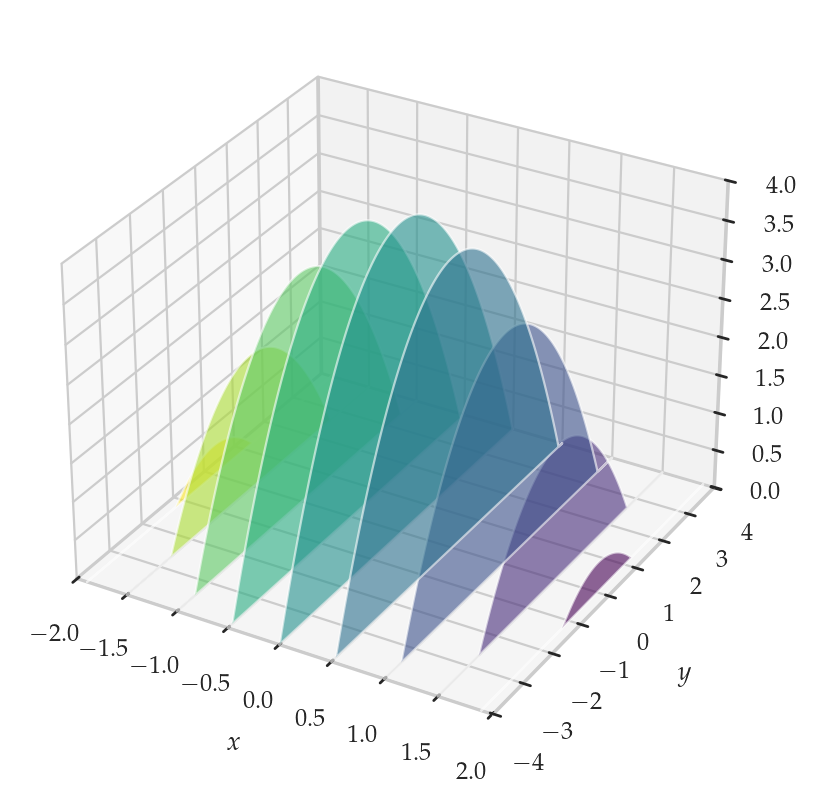

In [23]:
from ministats.book.figures import plot_slices_through_paraboloid


ax = plot_slices_through_paraboloid(direction="x")

filename = os.path.join("figures/tutorials/calculus", "mulivar_x_slices_through_paraboloid.pdf")
savefigure(ax, filename)

Saved figure to figures/tutorials/calculus/mulivar_y_slices_through_paraboloid.pdf
Saved figure to figures/tutorials/calculus/mulivar_y_slices_through_paraboloid.png


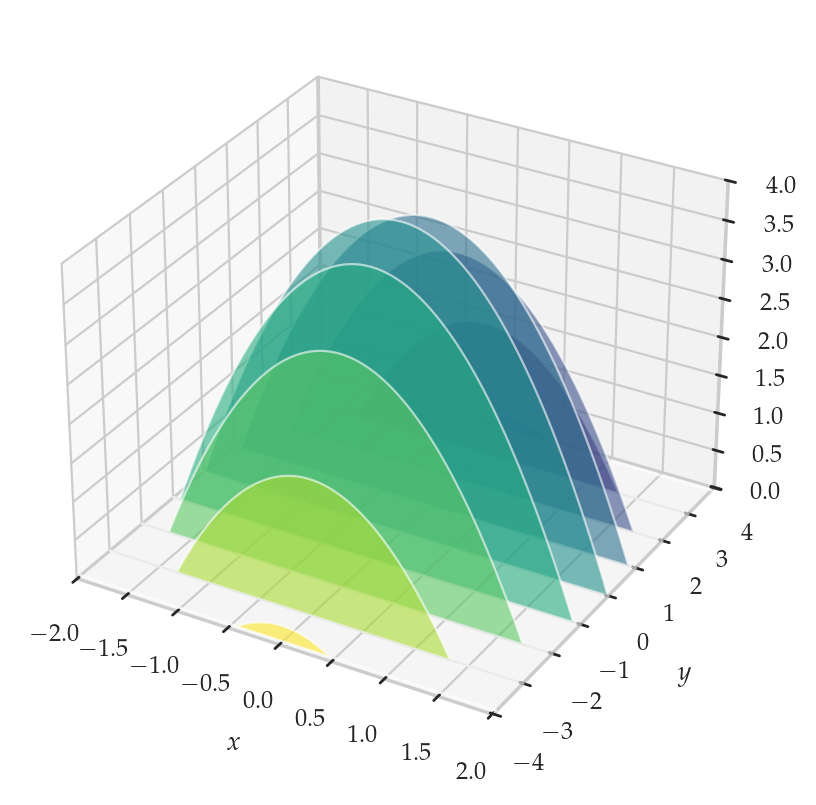

In [24]:
ax = plot_slices_through_paraboloid(direction="y")

filename = os.path.join("figures/tutorials/calculus", "mulivar_y_slices_through_paraboloid.pdf")
savefigure(ax, filename)

## Vector calculus

### Example: electric field around a positive charge

Saved figure to figures/tutorials/calculus/vector_calc_E_field_positive_charge.pdf
Saved figure to figures/tutorials/calculus/vector_calc_E_field_positive_charge.png


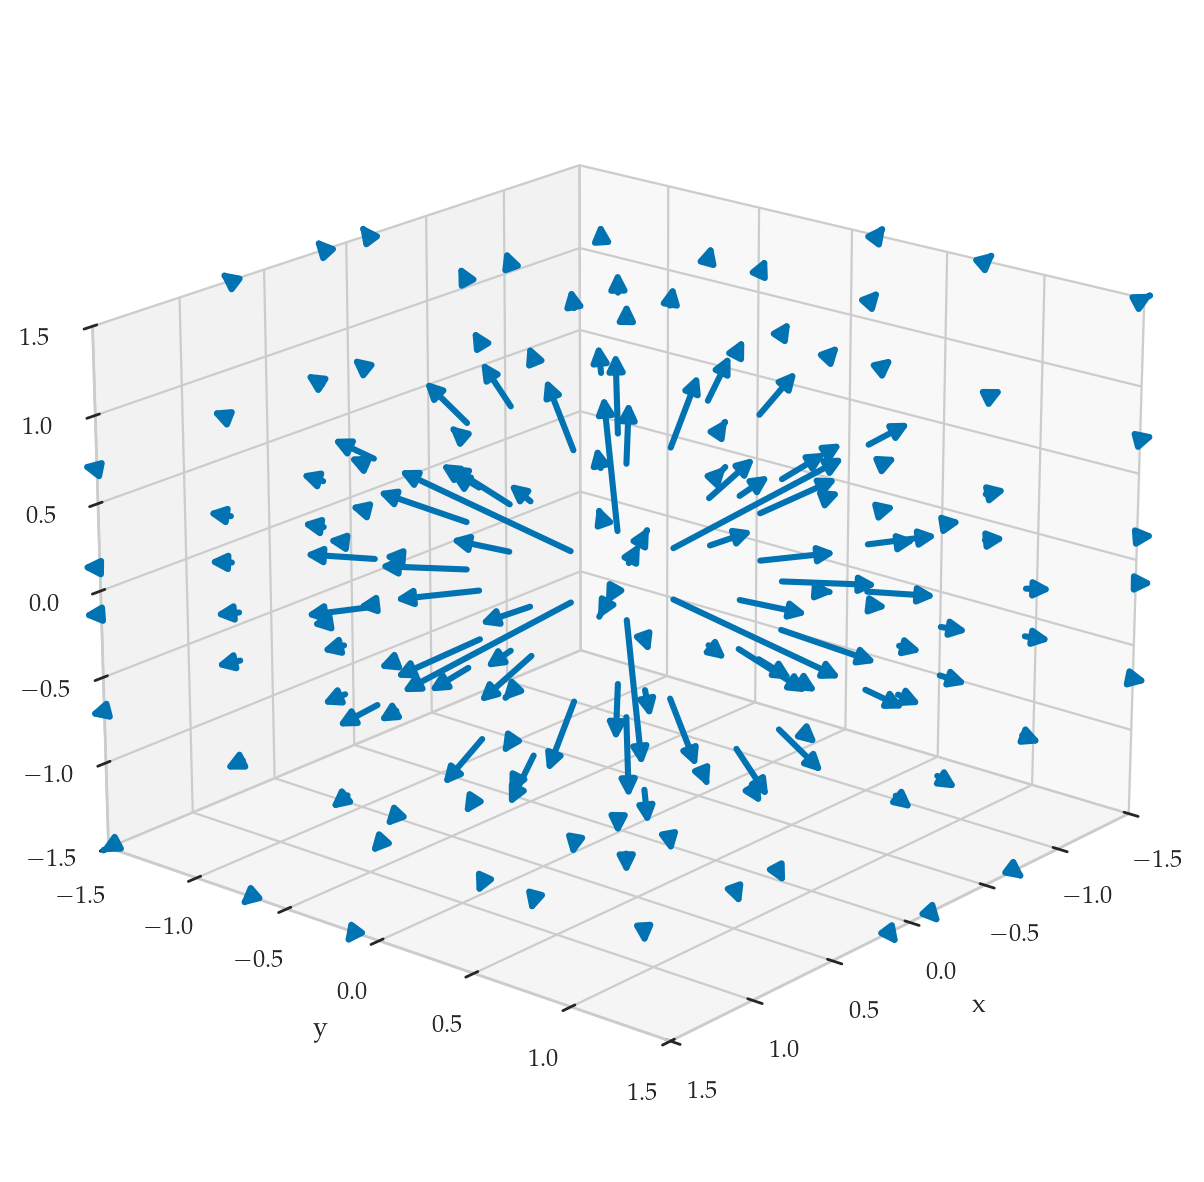

In [25]:
from ministats.book.figures import plot_point_charge_field

ax = plot_point_charge_field(elev=20, azim=40, grid_lim=1.5, n_points=6)

filename = os.path.join("figures/tutorials/calculus", "vector_calc_E_field_positive_charge.pdf")
savefigure(ax, filename)

# CUT MATERIAL

#### Trapezoid approximation

Let's now use another approach based on the trapezoid approximation.

We must build array of inputs $x$ and outputs $g(x)$ of the function,
then pass it to `trapz` so it carries out the calculation.

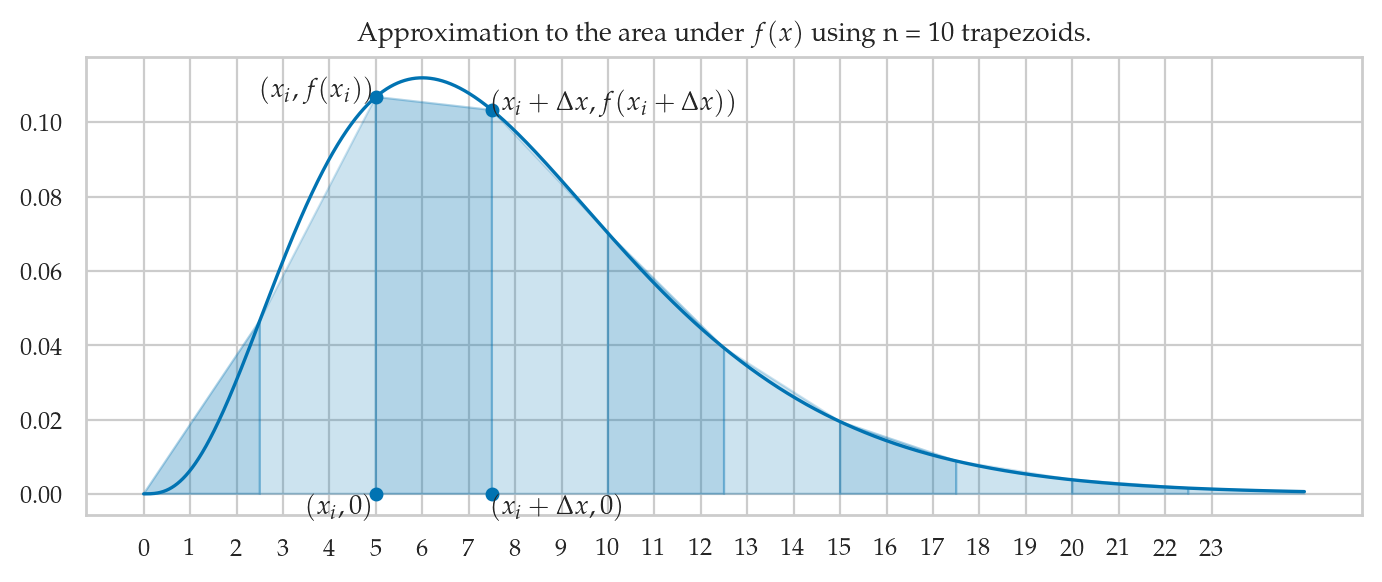

In [26]:

import matplotlib.pyplot as plt
from scipy.stats import chi2

n = 10

X2 = chi2(df=8)
f = X2.pdf

a = 0
b = 25


with plt.rc_context({"figure.figsize":(7,3)}):

    # x and y values for the trapezoid rule
    xs = np.linspace(a, b, n+1)
    ys = f(xs)

    # X and Y values for plotting y=f(x)
    X = np.linspace(a, b, 10000)
    Y = f(X)
    plt.plot(X,Y)
    plt.xticks(range(0,b-1))
    ax = plt.gca()
    ax.set_title(f'Approximation to the area under $f(x)$ using n = {n} trapezoids.')

    for i in range(n):
        xcoords = [xs[i], xs[i],    xs[i+1],    xs[i+1] ]
        ycoords = [0,     f(xs[i]), f(xs[i+1]), 0      ]
        alpha = 0.2 if i%2==1 else 0.3
        plt.fill(xcoords, ycoords, 'b', edgecolor='b', alpha=alpha)
        if i == 2:
            plt.plot(xs[i],   0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   0,          '$(x_i, 0)$', ha='right', va='top')
            plt.plot(xs[i],   f(xs[i]),   marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   f(xs[i]),   '$(x_i, f(x_i))$', ha='right')
            plt.plot(xs[i+1], 0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], 0,          '$(x_i+\\Delta x, 0)$', ha='left', va='top')
            plt.plot(xs[i+1], f(xs[i+1]), marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], f(xs[i+1]), '$(x_i+\\Delta x, f(x_i+\\Delta x))$')

    ax.figure.tight_layout()
    # filename = "figures/plot_of_trapezoid_under_chi2_df_eq_8.pdf"
    # ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)